The first step of any data science project is, unsurprisngly, finding the data you will do your analysis on. For this tutorial we will be using data from OpenNeuro (see https://openneuro.org/). OpenNeuro is a great site with lots of open source neural data collected using a variety of different techniques like MRI, PET, and EEG. We will specifically be using data from The Amsterdam Open MRI Collection (see https://openneuro.org/datasets/ds002785/versions/2.0.0). Because this tutorial is an introduction to data science we will not be doing anything with neural computation on MRI data, but instead we will work with psychological data contained within the The Amsterdam Open MRI Collection. In particular we will look at data from the emotion matching task (see "Emotion matching" section in https://www.nature.com/articles/s41597-021-00870-6). The first thing we must do is read in our data so that we can work with it. This step is shown below. 

In [24]:
# It is common practice to shorten 'pandas' to 'pd' for 
# less typing when calling functions from the pandas library.
import pandas as pd

# In this part, I read in the data. The data is in several different files
# which I would like to combine into one dataframe. 

df_participants = pd.read_csv("https://openneuro.org/crn/datasets/ds002785/snapshots/2.0.0/files/participants.tsv",sep='\t')
df_subjects = pd.DataFrame()

for i in range(1, len(df_participants)+1):
    df_subject = pd.read_csv("https://openneuro.org/crn/datasets/ds002785/snapshots/2.0.0/files/sub-"+ str(i).zfill(4) +":func:sub-"+ str(i).zfill(4) +"_task-emomatching_acq-seq_events.tsv",sep='\t')
   
    # Some participants never did the emotion matching task so there is no csv at the link above.
    # In this case the length of the dataframe df_subject is 0. 
    if (len(df_subject) != 0):
        
        # Appends a column to the specific subject's data frame indicating what subject number they 
        # are in each row. This will be useful when all the subjects' data are put together in one
        # dataframe so we can keep track of what data is connected to a given subject.
        df_subject['subject'] = [i]*len(df_subject) 
        df_subjects = pd.concat([df_subjects, df_subject])
        
df_subjects = df_subjects.reset_index()
df_subjects



,index,onset,duration,trial_type,response_time,response_hand,response_accuracy,ori_match,sex,ethn_target,ethn_match,ethn_distractor,emo_match,subject
0,0,10.0115,1.9212,control,1.9212,right,correct,vertical,NaN,NaN,NaN,NaN,NaN,1
1,1,15.0197,1.3478,control,1.3478,left,correct,vertical,NaN,NaN,NaN,NaN,NaN,1
2,2,20.0279,1.2605,control,1.2605,right,correct,horizontal,NaN,NaN,NaN,NaN,NaN,1
3,3,25.0362,0.9700,control,0.9700,left,correct,horizontal,NaN,NaN,NaN,NaN,NaN,1
4,4,30.0444,0.8287,control,0.8287,right,correct,horizontal,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10027,43,225.3638,4.9000,emotion,NaN,NaN,miss,NaN,female,black,asian,asian,fear,215
10028,44,230.3720,2.6348,emotion,2.6348,right,correct,NaN,male,caucasian,caucasian,caucasian,anger,215
10029,45,235.3802,4.9000,emotion,NaN,NaN,miss,NaN,male,black,black,black,fear,215
10030,46,240.3884,4.9000,emotion,NaN,NaN,miss,NaN,female,caucasian,caucasian,caucasian,anger,215


What did we do? First we imported the relevant libraries, just pandas in our case. We want to read in the tsv file 
containing data about our participants (subjects) and also the tsv files containing data about the emotion matching task for each subject. Instead of manually downloading each file by hand we can inspect the html of the download buttons to get the actual tsv link. Here is what the process looks like for finding the participants tsv file link.

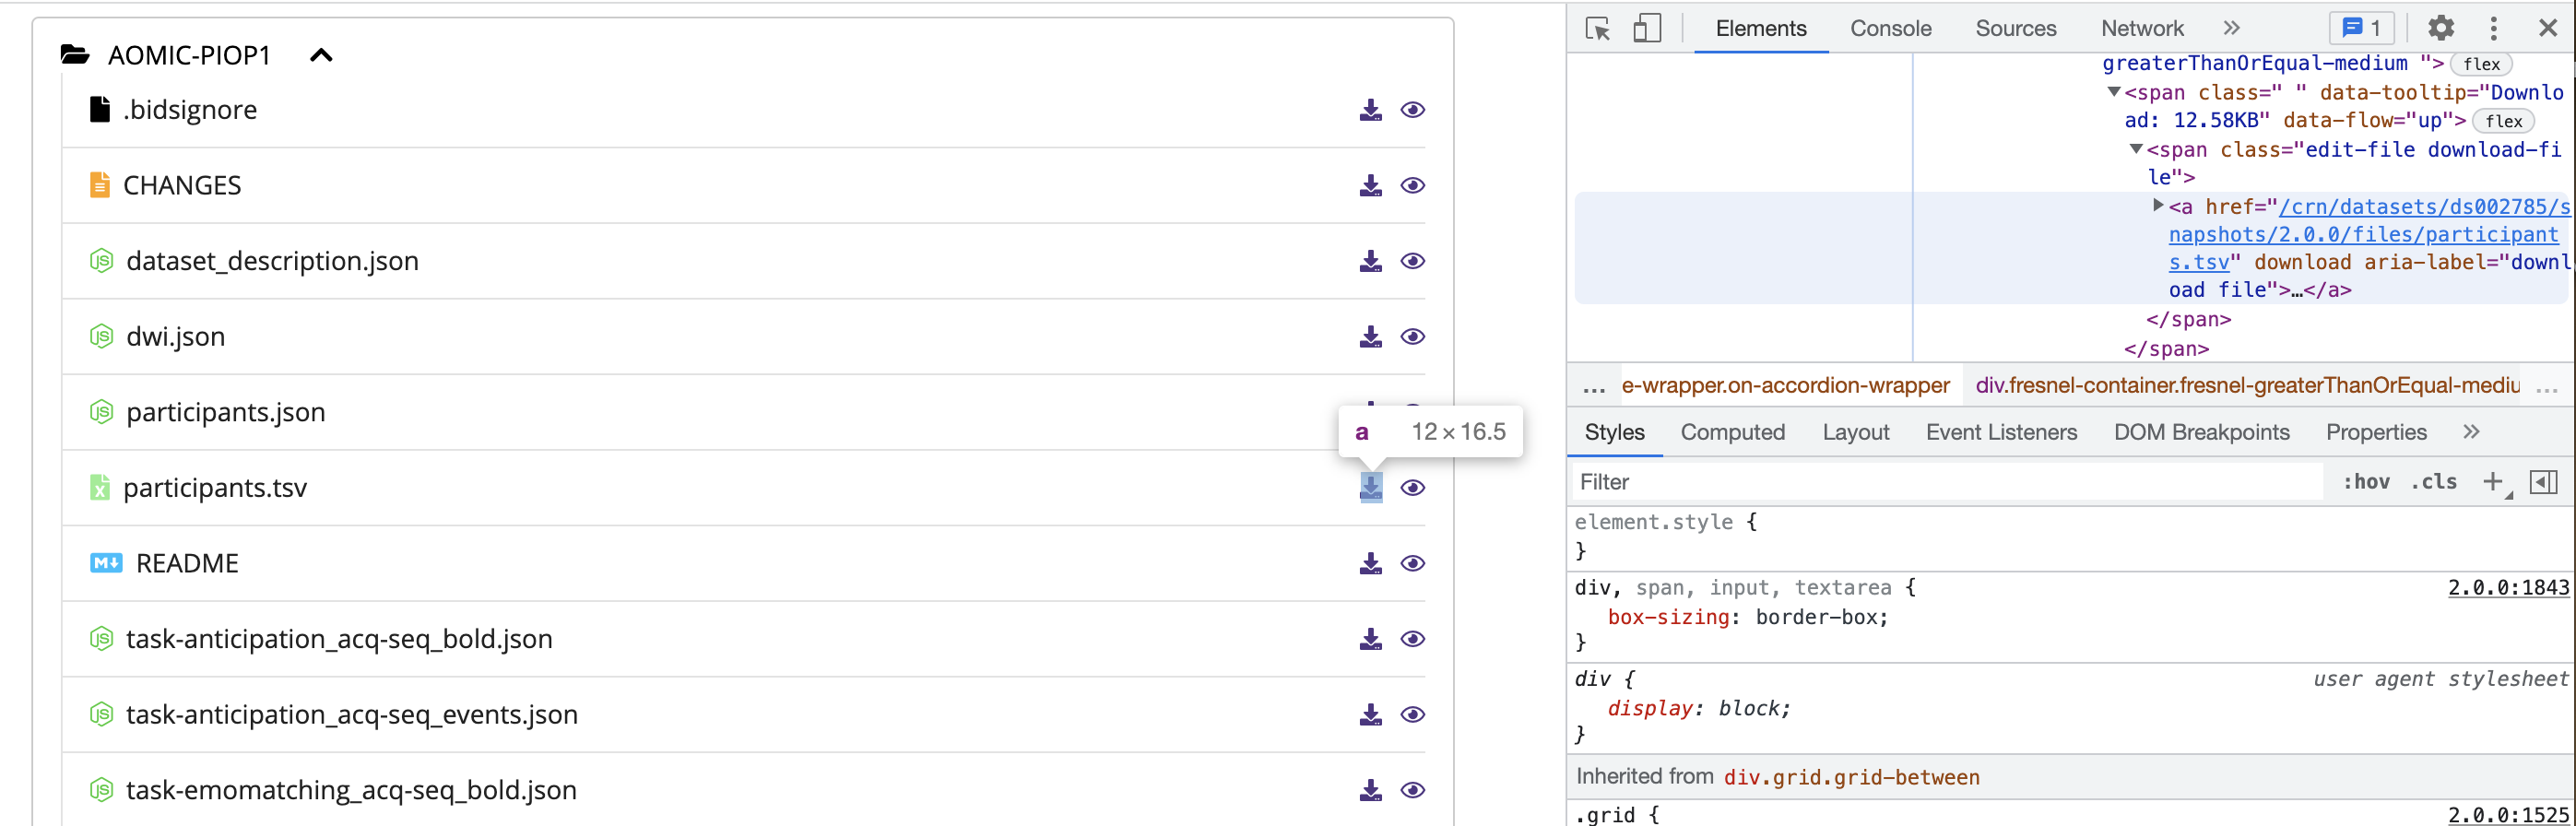

Once we have the link we can use pandas read_csv function to convert the tsv file into a pandas dataframe. We chose to store our data in a dataframe because a dataframe is a useful representation of tabular data (the sort we have). A dataframe would not have been a good choice if we wanted to store graph data like for a social network. 

It was simple to read in the participants tsv file since there was only one file with all the data. Reading in the emotion matching task data for each subject required more work because there was a different file for each subject. 
To accomplish this we exploited the fact that there was a regularity in the tsv links for each subject's emotion matching tsv file. All the links followed the format: "https://openneuro.org/crn/datasets/ds002785/snapshots/2.0.0/files/sub-"+ [subject number] +":func:sub-"+ [subject number] +"_task-emomatching_acq-seq_events.tsv".

Because of this regularity, we simply iterated through the subject numbers and attempted to read in the emotion matching tsv file for that subject. If we do this naively we will run into problems when we combine all the emotion matching data accross subjects because not all subjects did the emotion matching task. If a subject did not do the emotion matching task our attempted read-in will simply result in an empty dataframe which we do not want to process. Therefore, before processing the subject's dataframe we check if it is empty (if the length is 0). 

Our goal is to combine all the emotion matching data into one dataframe so we only have one table to work with for our analysis. As we read in non-empty emotion matching dataframes we concatenate them together to form one big dataframe. If we do this naively, though, we will lose track of what data was associated with a given subject. This before concatenating the dataframes we add a column to each subject's dataframe with that subject's number in all rows. We then reset the indices of the large dataframe so that they are ordered sequentially. The first and last few lines of the resulting dataframe is shown above.

For our purposes we only needed the pandas library. Other common libraries used for data collection are BeautifulSoup and requests. You can use requests to access an API and both of them if your data comes from webscraping. 
See here for documentation about the requests library: https://docs.python-requests.org/en/latest/
See here for documentation about the BeautifulSoup: https://beautiful-soup-4.readthedocs.io/en/latest/

Although we will not cover webscraping in this tutorial, if it is something you need I highly recommend this consice introduction: https://www.dataquest.io/blog/web-scraping-python-using-beautiful-soup/

should fully melt data by adding participant data to each row. 

In [22]:
# For each row checks that the data in each column takes the anticipated possible values.
# If not the index at with the unanticipated data is printed and the loop stops.
for index, row in df_subjects.iterrows():
    # onset should either be NaN or a float
    if (not (pd.isna(row['onset']) or isinstance(row['onset'], float))):
        print('onset')
        print(i)
        break
    # duration should either be NaN or a float
    if (not (pd.isna(row['duration']) or isinstance(row['duration'], float))):
        print('duration')
        print(i)
        break
    # trial_type should either be NaN, control, or emotion
    if (not (pd.isna(row['trial_type']) or (row['trial_type'] == 'control') or (row['trial_type'] == 'emotion'))):
        print('trial_type')
        print(i)
        break
    # response_time should either be NaN or a float
    if (not (pd.isna(row['response_time']) or isinstance(row['response_time'], float))):
        print('response_time')
        print(i)
        break
    # response_hand should either be NaN, control, or emotion
    if (not (pd.isna(row['response_hand']) or (row['response_hand'] == 'right') or (row['response_hand'] == 'left'))):
        print('response_hand')
        print(index)
        break
    # response_accuracy should either be NaN, correct, miss, or incorrect
    if (not (pd.isna(row['response_accuracy']) or (row['response_accuracy'] == 'correct') or (row['response_accuracy'] == 'miss') or (row['response_accuracy'] == 'incorrect'))):
        print('response_accuracy')
        print(index)
        break
    # ori_match should either be NaN, vertical, or horizontal 
    if (not (pd.isna(row['ori_match']) or (row['ori_match'] == 'vertical') or (row['ori_match'] == 'horizontal'))):
        print('ori_match')
        print(index) 
        break
    # sex should either be NaN, male, or female
    if (not (pd.isna(row['sex']) or (row['sex'] == 'male') or (row['sex'] == 'female'))):
        print('sex')
        break
    # ethn_target should either be NaN, caucasian, black, or asian
    if (not (pd.isna(row['ethn_target']) or (row['ethn_target'] == 'caucasian') or (row['ethn_target'] == 'black') or (row['ethn_target'] == 'asian'))):
        print('ethn_target')
        print(index)
        break
    # ethn_match should either be NaN, caucasian, black, or asian
    if (not (pd.isna(row['ethn_match']) or (row['ethn_match'] == 'caucasian') or (row['ethn_match'] == 'black') or (row['ethn_match'] == 'asian'))):
        print('ethn_match')
        print(index)
        break
    # emo_match should either be NaN, fear, or anger
    if (not (pd.isna(row['emo_match']) or (row['emo_match'] == 'fear') or (row['emo_match'] == 'anger'))):
        print('emo_match')
        print(index)
        break
    # ethn_distractor should either be NaN, caucasian, black, or asian
    if (not (pd.isna(row['ethn_distractor']) or (row['ethn_distractor'] == 'caucasian') or (row['ethn_distractor'] == 'black') or (row['ethn_distractor'] == 'asian'))):
        print('ethn_distractor')
        print(index)
        break
    

ethn_distractor
34


Per the paper describing the dataset (insert screen shot) there should not be an ethn_dsitractor variable. It is unclear where this variable came from. Moreover the documentation of the dataset in OpenNeuro (insert screen shots) says that the only levels of the variable are causasian, black, asian, or n/a. We can also see that the documentation is shotty for the emo_match variable. It says the levels are causasian, black, asian, or n/a when the paper says it is fear, anger, or n/a. We also see that the only column with unanticipated data is ethn_distractor. We therefore removed the ethn_distractor column as it should not have been there in the first place and will not contribute to our analysis.
(Stress the importance of reading documentation carefully and checking if data accurately reflects it).

In [23]:
df_subjects = df_subjects.drop('ethn_distractor',axis = 1)
df_subjects.head()

,index,onset,duration,trial_type,response_time,response_hand,response_accuracy,ori_match,sex,ethn_target,ethn_match,emo_match,subject
0,0,10.0115,1.9212,control,1.9212,right,correct,vertical,NaN,NaN,NaN,NaN,1
1,1,15.0197,1.3478,control,1.3478,left,correct,vertical,NaN,NaN,NaN,NaN,1
2,2,20.0279,1.2605,control,1.2605,right,correct,horizontal,NaN,NaN,NaN,NaN,1
3,3,25.0362,0.9700,control,0.9700,left,correct,horizontal,NaN,NaN,NaN,NaN,1
4,4,30.0444,0.8287,control,0.8287,right,correct,horizontal,NaN,NaN,NaN,NaN,1


Although the data values in each column are now all valid values, we must consider how we deal with the missing values. We can see in the first few rows of the table directly above that the columns called sex, ethn_target, ethn_match, and emo_match all have missing values at the same time. This is not by chance. Because those variables are only relevant when there is a face with a sex, ethnicity, and emotional expression to match, in control trials there would not be a value to put there. The table treats such cases as missing data by coding them as NaN. This is not quite accurate. The data is not missing, it is that there is no sex, ethnicity, or emotional expression to a shape in the control trials. Thus we should recode the sex, ethn_target, ethn_match, and emo_match as 'na' when trial_type = 'control' to denote not applicable. Similarly, when trial_type = 'emotion' there is no orientation of a shape to match since a face is displayed so ori_match should be set to 'na'. Lastly, we would also expect that when a subject fails to respond in the appropriate time, when response_accuracy = 'miss', then there would be no response time and no hand with which the person responded. The data is not missing since there would not be a world in which the other entries in the row are the same but where we could have one of the anticipated values. This if response_accuracy = 'miss' we will set response_time and response_hand to 'na'.

In [16]:
# Replaces the appropriate NaN values with na to reflect that the data is not genuinely missing.
for index, row in df_subjects.iterrows():
    if row['trial_type'] == 'control':
        df_subjects.at[index, 'sex'] = 'na'
        df_subjects.at[index, 'ethn_target'] = 'na'
        df_subjects.at[index, 'ethn_match'] = 'na'
        df_subjects.at[index, 'emo_match'] = 'na'
    if row['trial_type'] == 'emotion':
        df_subjects.at[index, 'ori_match'] = 'na'
    if row['response_accuracy'] == 'miss':
        df_subjects.at[index, 'response_time'] = 'na'
        df_subjects.at[index, 'response_hand'] = 'na'

df_subjects.isnull().values.any()



False

From the above code and output we see that when we recode not actually missing data as a new value 'na' (not applicable) there is no truly missing data left. This is not usually the case in data science so it will be worthwhile to spend some time talking about what truly missing data would have looked like, the different kinds of missing data, and what we would have done had there been a certain type of missing data. 